# Shoe Classifier

<https://github.com/wtongze/shoe-classifier>

## Import, Normalize, and Augment Image Dataset

In [2]:
import tensorflow as tf

data = tf.keras.utils.image_dataset_from_directory('./img', image_size=(240, 240), shuffle=True, batch_size=None)

class_names = data.class_names

Found 825 files belonging to 3 classes.


In [3]:
class_names

['adidas', 'converse', 'nike']

In [1]:
def changeImg(image, idx):
  image = tf.image.random_flip_left_right(image)
  image = tf.image.random_contrast(image, 0.6, 1)

  return image, idx

In [5]:
data = data.map(lambda x, y: (x/255, y)).repeat(2).map(changeImg)

## Visualize Dataset

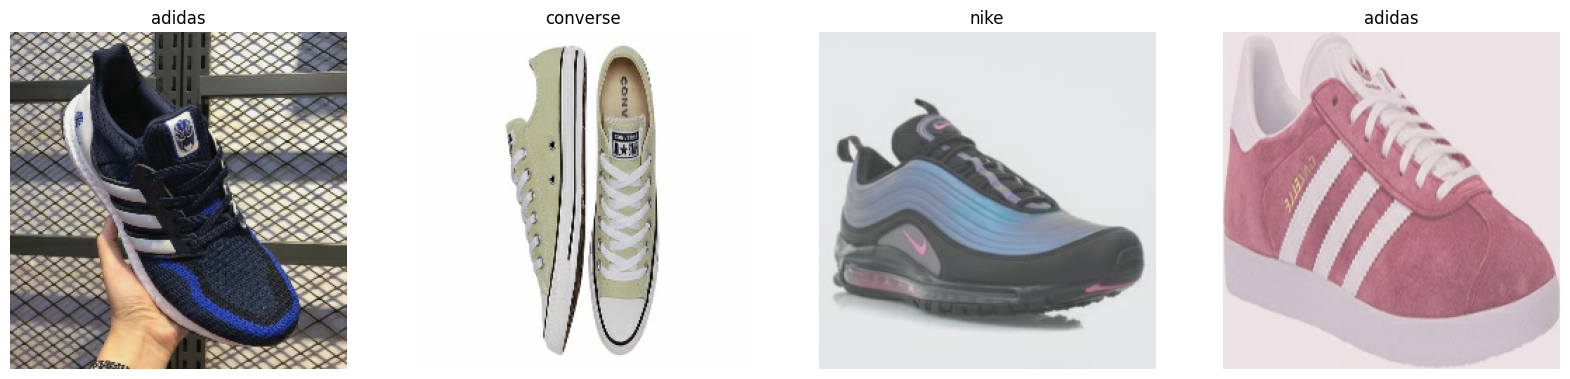

In [7]:
import matplotlib.pyplot as plt

def display(d):
    data_list = list(d.as_numpy_iterator())

    fig, ax = plt.subplots(ncols=4, figsize=(20,20))
    for idx, (img, label) in enumerate(data_list[:4]):
        ax[idx].imshow(img)
        ax[idx].axis('off')
        ax[idx].title.set_text(class_names[label])
    
    return len(data_list)

dataLength = display(data)


## Split Dataset

In [8]:
batch_size = 64
train_size = int(dataLength * 0.7)
val_size = int(dataLength * 0.2)
test_size = int(dataLength * 0.1)

train = data.take(train_size).batch(batch_size)
val = data.skip(train_size).take(val_size).batch(batch_size)
test = data.skip(train_size).skip(val_size).take(test_size).batch(batch_size)

In [9]:
len(list(train.as_numpy_iterator())), len(list(val.as_numpy_iterator())), len(list(test.as_numpy_iterator()))

(19, 6, 3)

## Build Model

In [10]:
def buildModel():
  model = tf.keras.models.Sequential([
  tf.keras.layers.InputLayer((240, 240, 3)),
  
  tf.keras.layers.Conv2D(16, 3, activation='relu', kernel_initializer='he_normal'),
  tf.keras.layers.MaxPool2D(),

  tf.keras.layers.Conv2D(16, 3, activation='relu', kernel_initializer='he_normal'),
  tf.keras.layers.MaxPool2D(),

  tf.keras.layers.Conv2D(16, 3, activation='relu', kernel_initializer='he_normal'),
  tf.keras.layers.MaxPool2D(),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(3, activation='softmax')
])

  model.compile(optimizer='nadam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  return model


In [11]:
model = buildModel()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 238, 238, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 119, 119, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 117, 117, 16)      2320      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 58, 58, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 16)        2320      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 28, 28, 16)        0

In [12]:
earlyStopping = tf.keras.callbacks.EarlyStopping(
  monitor="val_loss",
  min_delta=0.075,
  patience=5,
  verbose=0,
  mode="auto",
  baseline=None,
  restore_best_weights=True,
)
model.fit(train, epochs=100, validation_data=val, callbacks=[earlyStopping])

Epoch 1/100


2023-07-14 13:35:30.000612: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2023-07-14 13:35:31.044523: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f3c0a97a540 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-07-14 13:35:31.044552: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1660, Compute Capability 7.5
2023-07-14 13:35:31.048882: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-07-14 13:35:31.117179: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


19/19 [==============================] - 4s 77ms/step - loss: 1.9303 - accuracy: 0.3299 - val_loss: 1.1004 - val_accuracy: 0.3636
Epoch 2/100
19/19 [==============================] - 1s 60ms/step - loss: 1.0882 - accuracy: 0.3827 - val_loss: 1.0810 - val_accuracy: 0.3545
Epoch 3/100
19/19 [==============================] - 1s 57ms/step - loss: 1.0773 - accuracy: 0.3922 - val_loss: 1.0784 - val_accuracy: 0.3939
Epoch 4/100
19/19 [==============================] - 1s 60ms/step - loss: 1.0691 - accuracy: 0.4147 - val_loss: 1.0631 - val_accuracy: 0.4182
Epoch 5/100
19/19 [==============================] - 1s 59ms/step - loss: 1.0428 - accuracy: 0.4736 - val_loss: 1.0180 - val_accuracy: 0.4848
Epoch 6/100
19/19 [==============================] - 1s 58ms/step - loss: 1.0070 - accuracy: 0.4952 - val_loss: 1.0004 - val_accuracy: 0.4667
Epoch 7/100
19/19 [==============================] - 1s 58ms/step - loss: 0.9893 - accuracy: 0.5056 - val_loss: 0.9920 - val_accuracy: 0.4485
Epoch 8/100
19/19 

## Evaluate Model

In [15]:
model.evaluate(test)

3/3 [==============================] - 0s 12ms/step - loss: 0.1614 - accuracy: 0.9758


[0.1614164113998413, 0.9757575988769531]

1/1 [==============================] - 0s 9ms/step


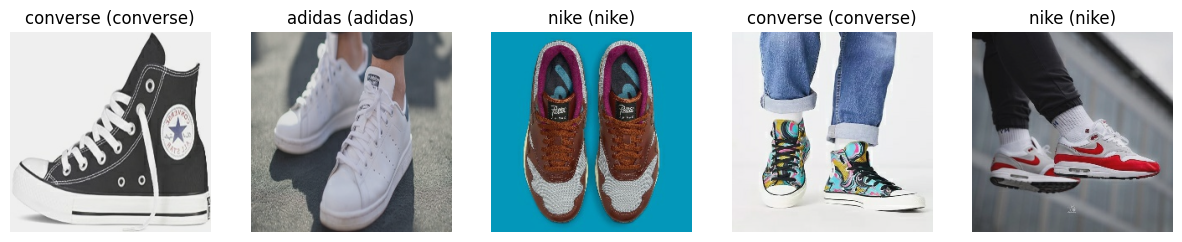

In [16]:
import numpy as np

count = 5
temp = test.unbatch().take(count).as_numpy_iterator()
lst = list(temp)

fig, axes = plt.subplots(1, count, figsize=(15, 3))

for idx, (img, label) in enumerate(lst):
  axes[idx].imshow(img)
  axes[idx].axis('off')
  
  prediction = model.predict(np.expand_dims(img, axis=0))
  pred_label = class_names[prediction.argmax()]

  axes[idx].set_title(f"{pred_label} ({class_names[label]})")


## Save Model

In [17]:
model.save('saved_model/v1')

INFO:tensorflow:Assets written to: saved_model/v1/assets


INFO:tensorflow:Assets written to: saved_model/v1/assets


In [18]:
import tensorflowjs as tfjs

tfjs.converters.save_keras_model(model, 'tfjs')

/home/wtongze/miniconda3/envs/tf/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
